In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [4]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


# EDA

# We'll just check out a simple pairplot for this small dataset.


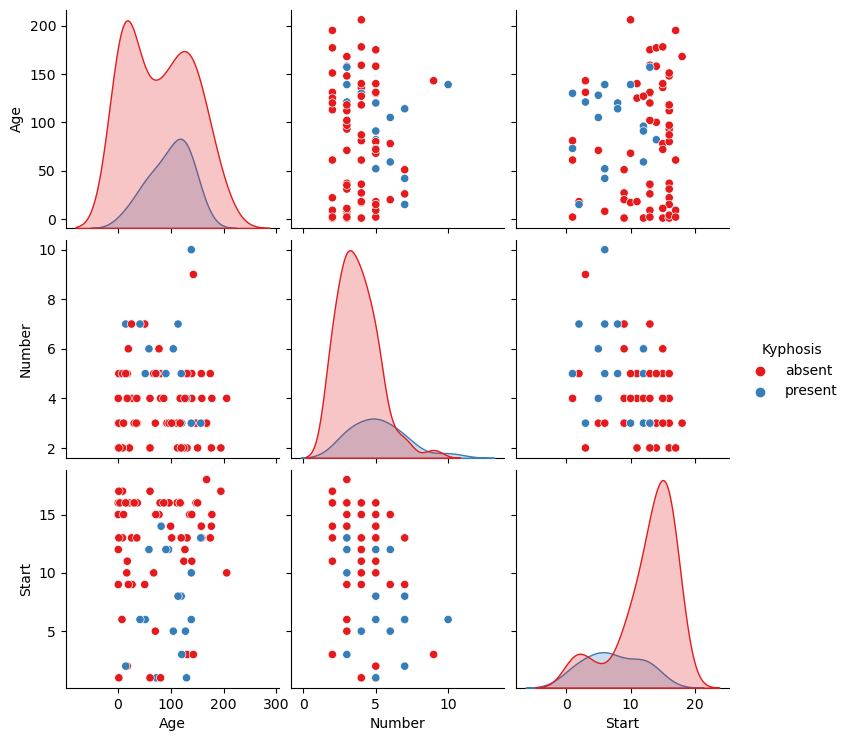

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
# Convert target labels to numeric values
y_numeric = y.map({'absent': 0, 'present': 1})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.30)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)

# n the above code, we have created a classifier object, in which we have passed two main parameters;

criterion='entropy':

Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
random_state=0":

For generating the random states. 

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
predictions = dtree.predict(X_test)

In [15]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.43      1.00      0.60         3

    accuracy                           0.84        25
   macro avg       0.71      0.91      0.75        25
weighted avg       0.93      0.84      0.86        25



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,predictions )
print("Confusion Matrix is:\n",cm)



Confusion Matrix is:
 [[18  4]
 [ 0  3]]


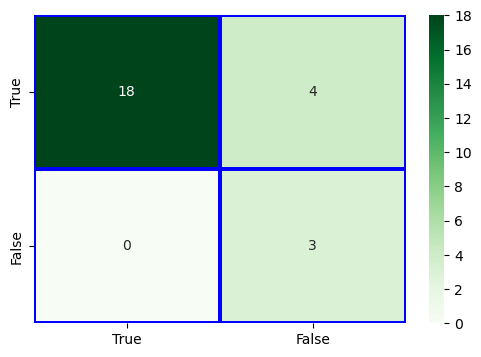

In [19]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['True','False'],
index =['True','False'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="blue",
linewidths=1.5)
plt.show()

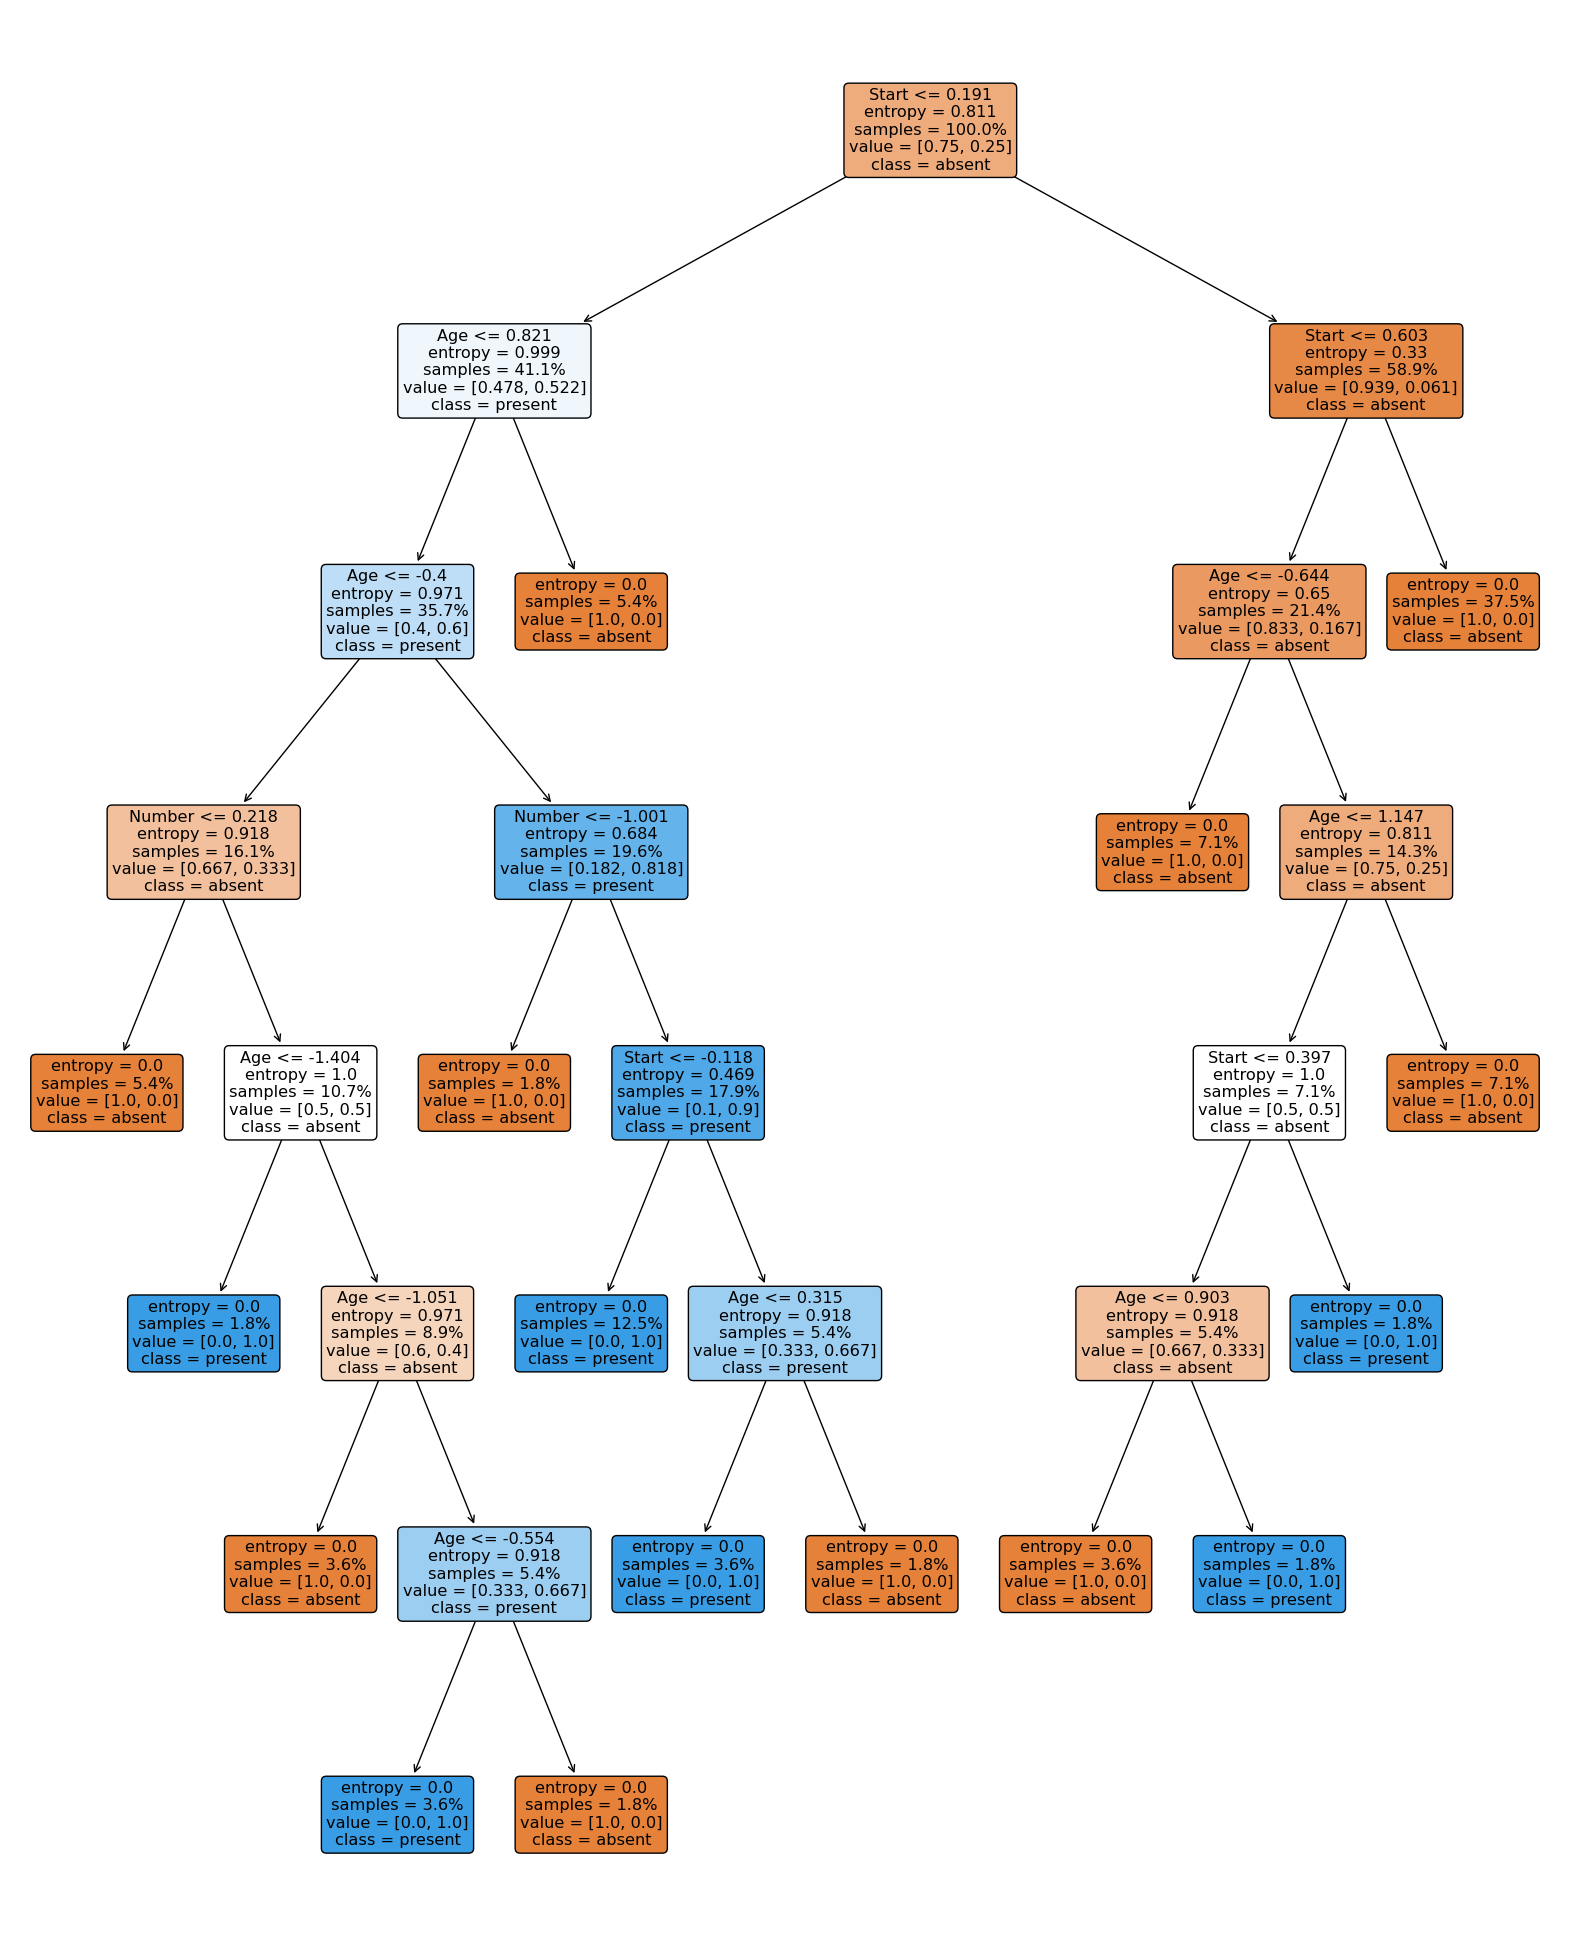

In [20]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['absent', 'present'],rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True
        )
plt.show()

In [21]:
print('Training set score: {:.4f}'.format(dtree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dtree.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8400
